In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoding layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoding layer
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build the autoencoder model
autoencoder = models.Model(input_img, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 228ms/step - loss: 0.2345 - val_loss: 0.0795
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 212ms/step - loss: 0.0788 - val_loss: 0.0746
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 211ms/step - loss: 0.0748 - val_loss: 0.0724
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 222ms/step - loss: 0.0728 - val_loss: 0.0711
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - loss: 0.0715 - val_loss: 0.0702
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 210ms/step - loss: 0.0707 - val_loss: 0.0696
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 214ms/step - loss: 0.0700 - val_loss: 0.0691
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 222ms/step - loss: 0.0691 - val_loss: 0.0682
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 220ms/step - loss: 0.0687 - val_loss: 0.0680


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


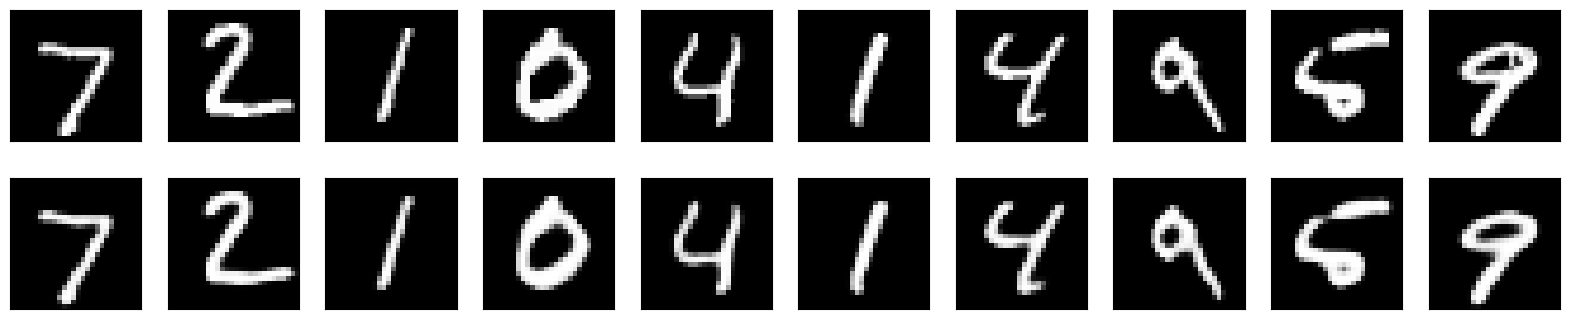

In [ ]:
# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)

# Display the results
n = 10  # Display the first 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()